## This code is for visualizing the degree distributions ## 

In [5]:
import torch_geometric
import torch
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 


#jupyter notebook --no-browser --port=40000 --ip=$HOSTNAME
# pip install jupyter i venv. 
# venv/jupyter
# venv/bin/jupyter-notebook --no-browser --port=40000 --ip=$HOSTNAME


In [2]:
#graph er en heterogenious graph. 
#author, field_of_study, institution, and paper, is node types. 
#num_nodes_dict={
#    author=1134649,
#    field_of_study=59965,
#    institution=8740,
#    paper=736389,
#}
#edge_reltype={
#    (author, affiliated_with, institution)=[1043998, 1],
#    (author, writes, paper)=[7145660, 1],
#    (paper, cites, paper)=[5416271, 1],
#    (paper, has_topic, field_of_study)=[7505078, 1],
#}
### the edge between the different affiliatoins: what paper, has topic on, what field of study. 
#Node Counts: How many nodes of each type exist.
#Edge Indices: How nodes are connected via different relationships.
#Node Features: Attributes of each node type.
#Node Year: Temporal data related to nodes.
#Edge Relationship Types: Type information about edges.
#Node Labels: Labels for supervised learning tasks.


# Load the dataset
from ogb.nodeproppred import PygNodePropPredDataset

dataset = PygNodePropPredDataset(name = 'ogbn-mag') 

split_idx = dataset.get_idx_split()
train_idx, valid_idx, test_idx = split_idx["train"], split_idx["valid"], split_idx["test"]
graph = dataset[0] # pyg graph objec

c:\Users\jbirk\AppData\Local\Programs\Python\Python310\lib\site-packages\ogb\nodeproppred\dataset_pyg.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data, self.sl

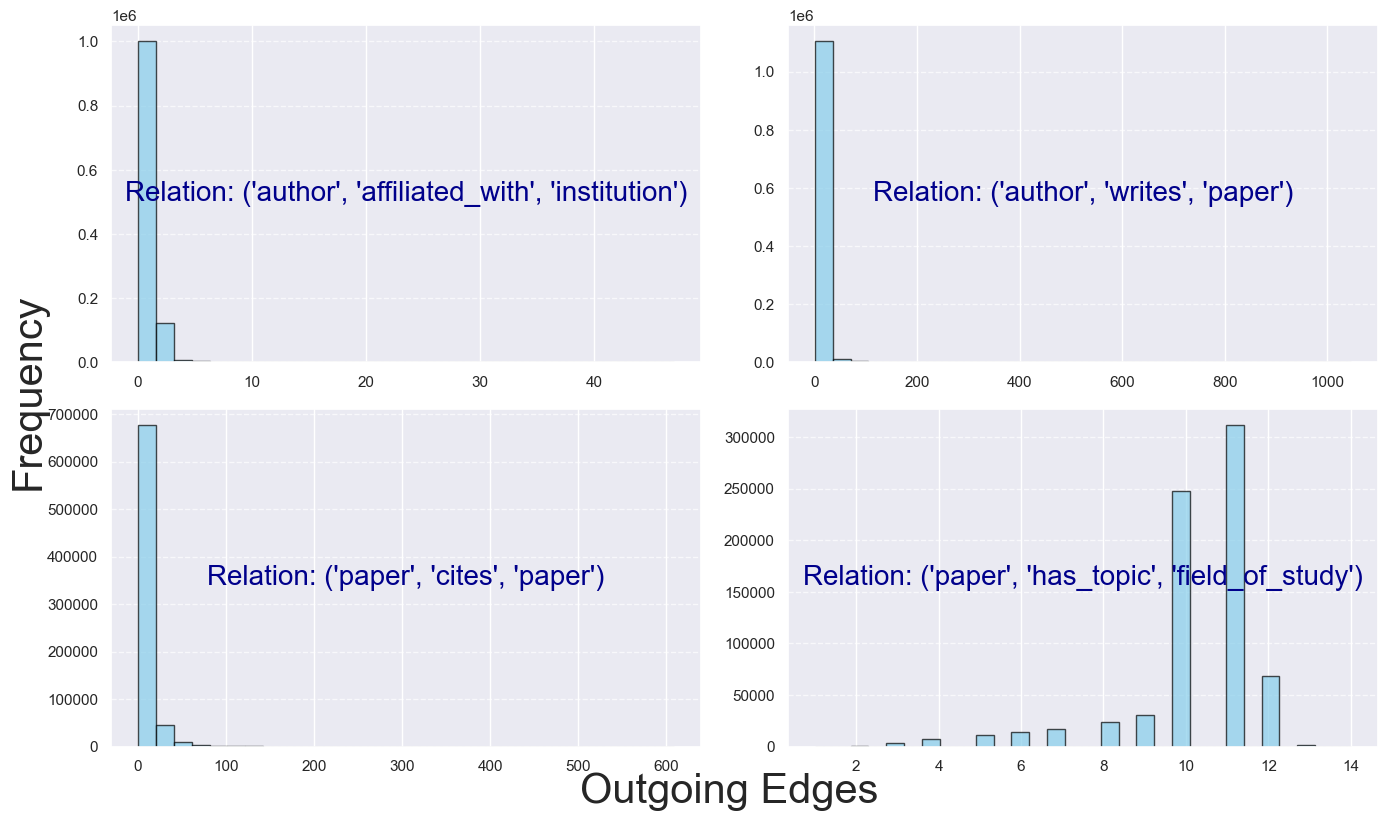

In [ ]:
# out degree for ('author', 'affiliated_with', 'institution')

def out_edges(relation):
    out_degrees = np.bincount(np.array(graph.edge_index_dict[relation][0]))
    return out_degrees.tolist()
plt.figure(figsize=(14, 8))
sns.set(style="darkgrid")
# Loop gennem hver relation og plot histogram
for i, relation in enumerate(graph['edge_index_dict']):
    data = out_edges(relation)
    plt.subplot(2, 2, i + 1)
    plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Relation: {relation}')
    #plt.text(0.5, 0.5, f'Relation: {relation}', va='center', ha='center', fontsize=20, transform=plt.gca().transAxes, color='darkblue' )
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gcf().text(0.00, 0.5, 'Frequency', va='center', ha='center', rotation=90, size = 30)
plt.gcf().text(0.5, 0.00, 'Outgoing Edges', va='center', ha='center', size = 30 )

plt.tight_layout()
plt.show()

In [4]:
graph['edge_index_dict']

{('author',
  'affiliated_with',
  'institution'): tensor([[      0,       1,       2,  ..., 1134645, 1134647, 1134648],
         [    845,     996,    3197,  ...,    5189,    4668,    4668]]),
 ('author',
  'writes',
  'paper'): tensor([[      0,       0,       0,  ..., 1134647, 1134648, 1134648],
         [  19703,  289285,  311768,  ...,  657395,  671118,  719594]]),
 ('paper',
  'cites',
  'paper'): tensor([[     0,      0,      0,  ..., 736388, 736388, 736388],
         [    88,  27449, 121051,  ..., 421711, 427339, 439864]]),
 ('paper',
  'has_topic',
  'field_of_study'): tensor([[     0,      0,      0,  ..., 736388, 736388, 736388],
         [   145,   2215,   3205,  ...,  21458,  22283,  31934]])}

In [ ]:
# read on metapath2vec. 
